<a href="https://colab.research.google.com/github/barsha-1o/ML-PROJECTS/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC SURVIVAL PREDICTION PROJECT**

**-->IMPORTING LIBRARIES**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


**-->DATA COLLECTION**

In [ ]:
tit_data=pd.read_csv("/content/drive/MyDrive/train (3).csv")

In [ ]:
print(tit_data)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [ ]:
print(tit_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
tit_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

tit_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:

tit_data.shape

(891, 12)

In [ ]:
#to calculate no. of missing values in each row and column
tit_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**REMOVING NULL DATAS**

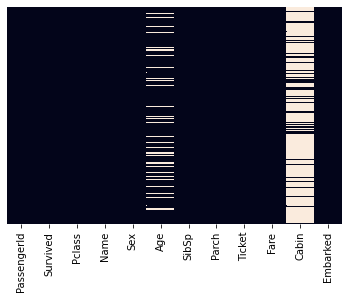

In [ ]:
sns.heatmap(tit_data.isnull(), yticklabels = False, cbar = False)

In [ ]:
tit_data=tit_data.drop(columns='Cabin',axis=1)

In [ ]:
print(tit_data['Age'].mean())

29.69911764705882


In [ ]:
#Here,we fill the missing values of 'Age' column by its mean value
tit_data['Age'].fillna(tit_data['Age'].mean(),inplace=True)

In [ ]:
print(tit_data['Embarked'].mode())

0    S
dtype: object


In [ ]:

#Here,we fill the missing values of 'Embarked' column by its mode value
tit_data['Embarked'].fillna(tit_data['Embarked'].mode()[0],inplace=True)

In [ ]:
tit_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
print(tit_data.describe())

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


# EDA

In [ ]:
sns.set()

In [ ]:
tit_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


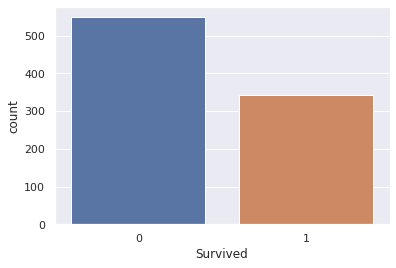

In [ ]:
sns.countplot('Survived',data=tit_data)

In [ ]:
tit_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


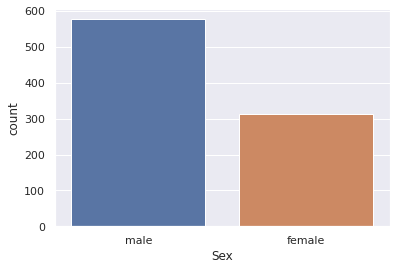

In [ ]:
sns.countplot('Sex',data=tit_data)

**PLOTTING SEX AGAINST SURVIVED**

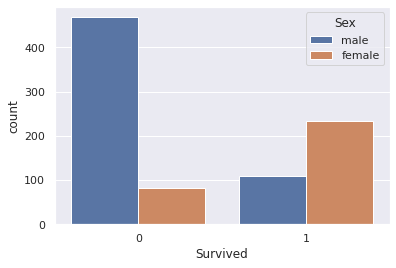

In [ ]:
sns.countplot(x = 'Survived',data = tit_data,hue = 'Sex')

**TAKEAWAY:THE NUMBER OF MALE WHO SURVIVED ARE MORE THAN FEMALE**

In [ ]:
tit_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


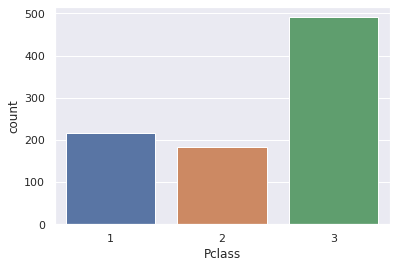

In [ ]:
sns.countplot('Pclass',data=tit_data)

 **PLOTTING PCLASS AGAINST SURVIVED**

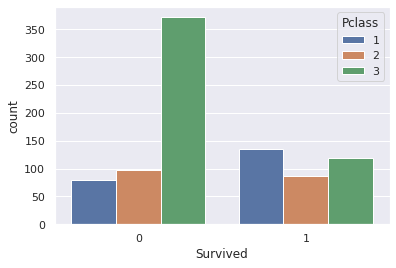

In [ ]:
sns.countplot(x = 'Survived',data = tit_data,hue = 'Pclass')

**TAKEAWAY:PEOPLE WITH 3rd TICKET CLASS SURVIVED IN MORE NUMBER THAN OTHER CLASS**

In [ ]:
tit_data['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

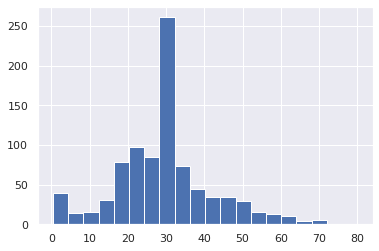

In [ ]:
tit_data['Age'].hist(bins = 20)

In [ ]:
tit_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


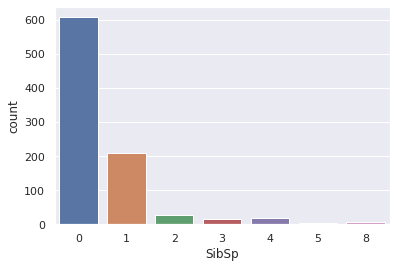

In [ ]:
sns.countplot('SibSp',data=tit_data)

**ENCODING CATEGORICAL COLUMN**

In [ ]:
tit_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
tit_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**CORRELATION**

In [ ]:
corr=tit_data.corr()
corr.shape

(7, 7)

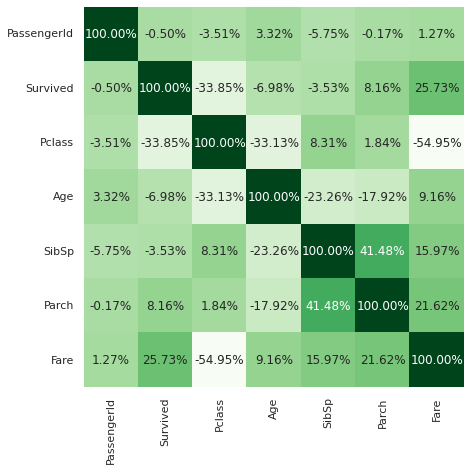

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

**CONVERTING CATEGORICAL COLUMN**

Converting the alphabetical values into numeric values

In [ ]:
tit_data.replace({'Sex' : {'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True) 

In [ ]:
tit_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**SEPARATING FEATURES AND TARGET**

Here,we drop/remove the columns 'Name','Ticket' as they aren't affecting the target variable much.

In [ ]:
X=tit_data.drop(columns=['Name','Ticket','Survived'],axis=1)
Y=tit_data['Survived']

In [ ]:

print(X)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0              1       3    0  22.000000      1      0   7.2500         0
1              2       1    1  38.000000      1      0  71.2833         1
2              3       3    1  26.000000      0      0   7.9250         0
3              4       1    1  35.000000      1      0  53.1000         0
4              5       3    0  35.000000      0      0   8.0500         0
..           ...     ...  ...        ...    ...    ...      ...       ...
886          887       2    0  27.000000      0      0  13.0000         0
887          888       1    1  19.000000      0      0  30.0000         0
888          889       3    1  29.699118      1      2  23.4500         0
889          890       1    0  26.000000      0      0  30.0000         1
890          891       3    0  32.000000      0      0   7.7500         2

[891 rows x 8 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


**SPLITTING DATA INTO TRAINING AND TESTING**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(891, 8) (712, 8) (179, 8)


# **MODEL TRAINING** 

**1.LOGISTIC REGRESSION ALGORITHM**


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_prediction=model.predict(X_test)

In [ ]:
score_model=round(accuracy_score(Y_prediction,Y_test)*100,2)
print("The accuracy score is : "+str(score_model)+"%")

The accuracy score is : 83.8%


**2.RANDOM FOREST ALGORITHM**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,Y_train)
Predict= clf_forest.predict(X_test)
score_model1=round(accuracy_score(Predict,Y_test)*100,2)
print("The accuracy score is : "+str(score_model1)+"%")

The accuracy score is : 82.12%


**3.NAIVE BAYES ALGORITHM**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train,Y_train)
prediction = clf_NB.predict(X_test)
score_model2=round(accuracy_score(Y_test,prediction)*100,2)
print("The accuracy score is : "+str(score_model2)+"%")

The accuracy score is : 83.8%


**WE GOT MORE SAME ACCURACY FROM NAIVE BAYES AND LOGISTIC REGRESSION.
LET US TEST LOGISTIC REGRESSION ALGORITHM FOR OUR MODEL**

 **MODEL TESTING**

In [ ]:
confusion_matrix(Y_test,Y_prediction)


array([[103,   9],
       [ 20,  47]])

In [ ]:
pd.DataFrame(confusion_matrix(Y_test,Y_prediction),columns=['Predicted No','Predicted Yes'],index=['No','Yes'])

,Predicted No,Predicted Yes
No,103,9
Yes,20,47


# **CONCLUSION**:
The main purpose of this project was to build a classification model that could successfully determine either a passenger survived or died.We used logistic Regression model for this project and got the accuracy score 83.8%.